<a href="https://colab.research.google.com/github/magbotta/sepsis-mimiciii/blob/main/notebooks/Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, plot_confusion_matrix, plot_roc_curve, mean_squared_error, r2_score

In [17]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount = True)

gdrive_rootpath = '/content/gdrive/MyDrive/'

Mounted at /content/gdrive


In [18]:
df = pd.read_csv(gdrive_rootpath + 'mimic_in_hosp_death_clean.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62477 entries, 0 to 62476
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SUBJECT_ID                        62477 non-null  int64  
 1   HADM_ID                           62477 non-null  int64  
 2   ADMISSION_TYPE                    62477 non-null  object 
 3   ADMITTIME                         62477 non-null  object 
 4   DISCHTIME                         62477 non-null  object 
 5   DEATHTIME                         6624 non-null   object 
 6   IN_HOSP_DEATH                     62477 non-null  int64  
 7   DIAGNOSIS                         62452 non-null  object 
 8   MARITAL_STATUS                    62477 non-null  object 
 9   INSURANCE                         62477 non-null  object 
 10  LANGUAGE                          62477 non-null  object 
 11  RELIGION                          62477 non-null  object 
 12  ETHN

In [20]:
df.head()

,SUBJECT_ID,HADM_ID,ADMISSION_TYPE,ADMITTIME,DISCHTIME,DEATHTIME,IN_HOSP_DEATH,DIAGNOSIS,MARITAL_STATUS,INSURANCE,LANGUAGE,RELIGION,ETHNICITY,GENDER,DOB,LOS_ICU,CALLOUT_COUNT,DIAG_COUNT,PRES_COUNT,PROC_COUNT,CPT_COUNT,LAB_COUNT,INPUTS_CV_COUNT,INPUTS_MV_COUNT,OUTPUT_COUNT,TRANSFER_COUNT,MICRO_COUNT,SEPSIS,ORGAN_FAILURE,CARDIOVASCULAR,RENAL,HEPATIC,HEMATOLOGIC,METABOLIC,NEUROLOGIC,HeartRate_Mean,SysBP_Mean,DiasBP_Mean,MeanBP_Mean,RespRate_Mean,...,SpO2_Mean,Glucose_Mean,AGE,LOS,PREDLOS,CALLOUT_COUNT_DAY,PRES_COUNT_DAY,PROC_COUNT_DAY,CPT_COUNT_DAY,LAB_COUNT_DAY,INPUTS_CV_COUNT_DAY,INPUTS_MV_COUNT_DAY,OUTPUT_COUNT_DAY,TRANSFER_COUNT_DAY,MICRO_COUNT_DAY,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,GENDER_F,RELIGION_CATHOLIC,RELIGION_NOT SPECIFIED,RELIGION_UNOBTAINABLE,RELIGION_OTHERS,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Medicaid,INSURANCE_OTHERS,MARITAL_STATUS_MARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN (DEFAULT),MARITAL_STATUS_OTHERS,LANGUAGE_ENGL,LANGUAGE_SPAN,LANGUAGE_RUSS,LANGUAGE_OTHERS,ETHNICITY_WHITE,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_OTHERS
0,7275,136809,EMERGENCY,2139-08-28 12:35:00,2139-09-01 16:32:00,NaN,0,ALTERED MENTAL STATUS; DYSPNEA,DIVORCED,Medicare,ENGL,EPISCOPALIAN,WHITE,M,2078-11-11 00:00:00,1.3848,1.0,15,44.0,1.0,7.0,182.0,0.0,18.0,0.0,3,47.0,1,1,0,1,0,0,0,0,92.772727,142.111111,56.722222,76.000000,20.875000,...,95.086957,133.750000,60,4.164583,0.0,0.200000,8.800000,0.200000,1.400000,36.4,0.000000,3.6,0.000000,0.600000,9.400000,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
1,17575,187131,EMERGENCY,2124-10-21 08:32:00,2124-11-01 11:14:00,NaN,0,MVA;TRAUMA,SINGLE,Government,ENGL,OTHER,BLACK/AFRICAN AMERICAN,M,2106-01-23 00:00:00,3.2653,0.0,9,0.0,9.0,0.0,408.0,331.0,0.0,89.0,3,27.0,0,1,0,0,0,0,0,0,108.268293,119.780488,53.317073,73.948718,18.291667,...,99.288889,115.000000,18,11.112500,1.0,0.000000,0.000000,0.750000,0.000000,34.0,27.583333,0.0,7.416667,0.250000,2.250000,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
2,25251,142346,EMERGENCY,2167-01-23 16:23:00,2167-02-06 13:53:00,NaN,0,INFECTED RIGHT FOOT,DIVORCED,Medicare,ENGL,EPISCOPALIAN,WHITE,M,2096-08-27 00:00:00,3.2458,0.0,9,0.0,8.0,0.0,574.0,390.0,0.0,90.0,6,46.0,0,0,0,0,0,0,0,0,96.522727,109.454545,57.795455,73.727273,15.500000,...,98.380952,149.619048,70,13.895833,1.0,0.000000,0.000000,0.571429,0.000000,41.0,27.857143,0.0,6.428571,0.428571,3.285714,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
3,32339,181355,EMERGENCY,2110-07-29 23:56:00,2110-08-04 15:10:00,NaN,0,GASTROINTESTINAL BLEED;CHEST PAIN;TELEMETRY,MARRIED,Medicare,ENGL,JEWISH,WHITE,M,1810-07-29 00:00:00,1.7603,1.0,15,30.0,2.0,8.0,207.0,0.0,21.0,20.0,4,0.0,0,1,0,1,0,0,1,0,50.038462,137.714286,44.571429,67.809524,17.038462,...,97.346154,105.000000,90,5.634722,1.0,0.166667,5.000000,0.333333,1.333333,34.5,0.000000,3.5,3.333333,0.666667,0.000000,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,30746,155603,EMERGENCY,2131-08-22 23:07:00,2131-08-28 13:10:00,NaN,0,ALTERED MENTAL STATUS,DIVORCED,Medicare,ENGL,JEWISH,WHITE,M,2055-03-16 00:00:00,5.5894,0.0,22,53.0,6.0,10.0,378.0,165.0,0.0,115.0,7,5.0,0,1,1,0,0,0,0,1,79.285714,130.814815,60.740741,79.740741,18.875000,...,98.827586,141.300000,76,5.585417,1.0,0.000000,8.833333,1.000000,1.666667,63.0,27.500000,0.0,19.166667,1.166667,0.833333,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [21]:
features_list = ['GENDER_F', 'AGE', 'LOS', 'LOS_ICU', 
                 'CALLOUT_COUNT_DAY', 'PRES_COUNT_DAY', 'PROC_COUNT_DAY',
                 'CPT_COUNT_DAY', 'LAB_COUNT_DAY', 'INPUTS_CV_COUNT_DAY',
                 'INPUTS_MV_COUNT_DAY', 'OUTPUT_COUNT_DAY', 'TRANSFER_COUNT_DAY',
                 'MICRO_COUNT_DAY', 
                 'ADMISSION_TYPE_ELECTIVE', 'ADMISSION_TYPE_EMERGENCY', 'ADMISSION_TYPE_NEWBORN', 'ADMISSION_TYPE_URGENT', 
                 'RELIGION_CATHOLIC', 'RELIGION_NOT SPECIFIED', 'RELIGION_UNOBTAINABLE', 'RELIGION_OTHERS', 
                 'INSURANCE_Medicare', 'INSURANCE_Private', 'INSURANCE_Medicaid', 'INSURANCE_OTHERS',
                 'MARITAL_STATUS_MARRIED', 'MARITAL_STATUS_SINGLE', 'MARITAL_STATUS_UNKNOWN (DEFAULT)', 'MARITAL_STATUS_OTHERS',
                 'LANGUAGE_ENGL', 'LANGUAGE_SPAN', 'LANGUAGE_RUSS', 'LANGUAGE_OTHERS',
                 'ETHNICITY_WHITE', 'ETHNICITY_BLACK/AFRICAN AMERICAN', 'ETHNICITY_UNKNOWN/NOT SPECIFIED', 'ETHNICITY_OTHERS']

len(features_list)

38

In [22]:
df.columns

Index(['SUBJECT_ID', 'HADM_ID', 'ADMISSION_TYPE', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'IN_HOSP_DEATH', 'DIAGNOSIS', 'MARITAL_STATUS',
       'INSURANCE', 'LANGUAGE', 'RELIGION', 'ETHNICITY', 'GENDER', 'DOB',
       'LOS_ICU', 'CALLOUT_COUNT', 'DIAG_COUNT', 'PRES_COUNT', 'PROC_COUNT',
       'CPT_COUNT', 'LAB_COUNT', 'INPUTS_CV_COUNT', 'INPUTS_MV_COUNT',
       'OUTPUT_COUNT', 'TRANSFER_COUNT', 'MICRO_COUNT', 'SEPSIS',
       'ORGAN_FAILURE', 'CARDIOVASCULAR', 'RENAL', 'HEPATIC', 'HEMATOLOGIC',
       'METABOLIC', 'NEUROLOGIC', 'HeartRate_Mean', 'SysBP_Mean',
       'DiasBP_Mean', 'MeanBP_Mean', 'RespRate_Mean', 'TempC_Mean',
       'SpO2_Mean', 'Glucose_Mean', 'AGE', 'LOS', 'PREDLOS',
       'CALLOUT_COUNT_DAY', 'PRES_COUNT_DAY', 'PROC_COUNT_DAY',
       'CPT_COUNT_DAY', 'LAB_COUNT_DAY', 'INPUTS_CV_COUNT_DAY',
       'INPUTS_MV_COUNT_DAY', 'OUTPUT_COUNT_DAY', 'TRANSFER_COUNT_DAY',
       'MICRO_COUNT_DAY', 'ADMISSION_TYPE_ELECTIVE',
       'ADMISSION_TYPE_EMERGENCY', 'ADMISSI

In [23]:
features_list = ['GENDER_F', 'AGE', 'LOS', 'LOS_ICU', 
                 'CALLOUT_COUNT_DAY', 'PRES_COUNT_DAY', 'PROC_COUNT_DAY',
                 'CPT_COUNT_DAY', 'LAB_COUNT_DAY', 'INPUTS_CV_COUNT_DAY',
                 'INPUTS_MV_COUNT_DAY', 'OUTPUT_COUNT_DAY', 'TRANSFER_COUNT_DAY',
                 'MICRO_COUNT_DAY', 
                 'ADMISSION_TYPE_ELECTIVE', 'ADMISSION_TYPE_EMERGENCY', 'ADMISSION_TYPE_NEWBORN', 'ADMISSION_TYPE_URGENT', 
                 'RELIGION_CATHOLIC', 'RELIGION_NOT SPECIFIED', 'RELIGION_OTHERS', 
                 'INSURANCE_Medicare', 'INSURANCE_Private', 'INSURANCE_Medicaid', 'INSURANCE_OTHERS',
                 'MARITAL_STATUS_MARRIED', 'MARITAL_STATUS_SINGLE', 'MARITAL_STATUS_OTHERS',
                 'LANGUAGE_ENGL', 'LANGUAGE_SPAN', 'LANGUAGE_RUSS', 'LANGUAGE_OTHERS',
                 'ETHNICITY_WHITE', 'ETHNICITY_BLACK/AFRICAN AMERICAN', 'ETHNICITY_UNKNOWN/NOT SPECIFIED', 'ETHNICITY_OTHERS','ORGAN_FAILURE', 'CARDIOVASCULAR', 'RENAL', 'HEPATIC', 'HEMATOLOGIC',
       'METABOLIC', 'NEUROLOGIC', 'HeartRate_Mean', 'SysBP_Mean',
       'DiasBP_Mean', 'MeanBP_Mean', 'RespRate_Mean', 'TempC_Mean',
       'SpO2_Mean', 'Glucose_Mean']

len(features_list)

51

Train-test Split¶


In [9]:
X = df[features_list]
y = df['IN_HOSP_DEATH']

In [24]:
X = df[features_list]
y = df['SEPSIS']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2,  # 20% of data belongs to the test set
                                                    random_state = 1, # make sure the split is the same across different devices for illustrative purposes
                                                    stratify = y)     # ensure the number of positive examples in the train and test sets are similar

In [26]:
X_train.shape

(49981, 51)

In [27]:
X_test.shape

(12496, 51)

Logistic Regression

Model Training and Prediction

In [28]:
# 1. Specify a model to be trained
model_lr = LogisticRegression(random_state = 1, 
                              n_jobs = -1) # use all available CPUs within your Colab notebook for computation


In [29]:
# 2. Train the model
model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=1,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [30]:
# 3. Make predictions
y_pred_lr = model_lr.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
model_lr.predict_proba(X_test) # the two columns represent the prob of 0 and 1 respectively

array([[0.54754375, 0.45245625],
       [0.81037862, 0.18962138],
       [0.61771473, 0.38228527],
       ...,
       [0.85173732, 0.14826268],
       [0.78854908, 0.21145092],
       [0.98244124, 0.01755876]])

Evaluation

In [32]:
accuracy_score(y_test, y_pred_lr)


0.8766005121638925

In [33]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.90      0.97      0.93     10694
           1       0.64      0.33      0.43      1802

    accuracy                           0.88     12496
   macro avg       0.77      0.65      0.68     12496
weighted avg       0.86      0.88      0.86     12496



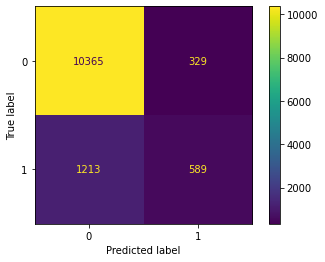

In [34]:
plot_confusion_matrix(model_lr, X_test, y_test, values_format = 'd')
plt.show()

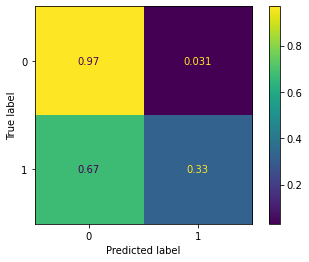

In [35]:
# recall-related metrics
plot_confusion_matrix(model_lr, X_test, y_test, normalize = 'true') 
plt.show()

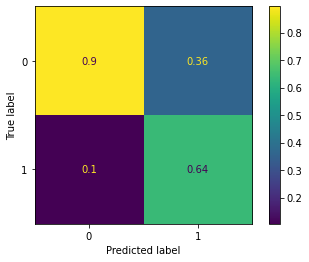

In [36]:
# precision-related metrics
plot_confusion_matrix(model_lr, X_test, y_test, normalize = 'pred')
plt.show()

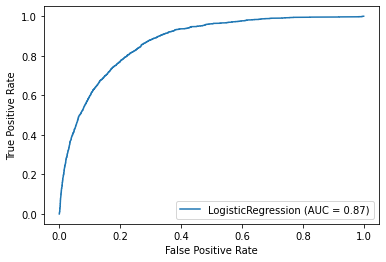

In [37]:
plot_roc_curve(model_lr, X_test, y_test)
plt.show()

##Random Forest Model

Model Training and Prediction¶


In [38]:
model_rf1 = RandomForestClassifier(n_estimators = 200, 
                                   random_state = 1,
                                   n_jobs = -1)

In [39]:
model_rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [40]:
y_pred_rf1 = model_rf1.predict(X_test)


Evaluation

In [41]:
print(classification_report(y_test, y_pred_rf1))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10694
           1       0.77      0.42      0.54      1802

    accuracy                           0.90     12496
   macro avg       0.84      0.70      0.74     12496
weighted avg       0.89      0.90      0.89     12496



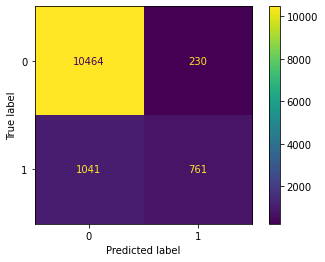

In [42]:
plot_confusion_matrix(model_rf1, X_test, y_test, values_format = 'd')
plt.show()

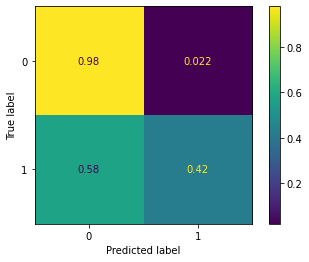

In [43]:
plot_confusion_matrix(model_rf1, X_test, y_test, normalize = 'true') # recall
plt.show()

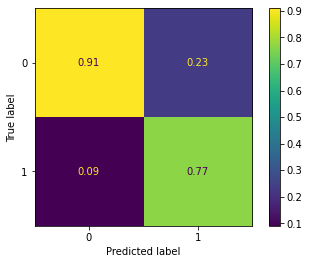

In [44]:
plot_confusion_matrix(model_rf1, X_test, y_test, normalize = 'pred') # precision
plt.show()

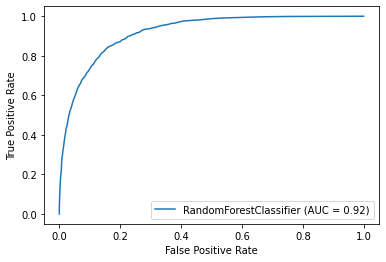

In [45]:
plot_roc_curve(model_rf1, X_test, y_test)


##Tuning Random Forest Model

In [46]:
# a set of hyperparameters and their respective values to be tested

param_grid = {
    'n_estimators': [100, 200, 300],   # number of decision trees in the forest 
    'max_depth': [10, 40, None],       # how many times can each tree be split. None means no specific limit. 
    'class_weight': ['balanced', None] # weight of each sample. None means equal weight, balanced would put more weight on the less represented classes
}

In [47]:
grid_search_rf = GridSearchCV(
    estimator = RandomForestClassifier(random_state = 1, n_jobs = -1), # define type of model to be tuned
    param_grid = param_grid,                                           # hyperparameters to be tested
    cv = 3,                                                            # 3-fold cross-validation
    scoring = 'f1',                                                    # metric to be optimized
    n_jobs = -1, 
    verbose = 2
    )

In [48]:
grid_search_rf.fit(X_train, y_train)

# this would take 10 to 15 minutes to run
# this could take even longer depending on the number of hyperparameters to be tested, number of folds or the size of the dataset

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 12.0min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False, random_state=1,
                                     


##Tuning Results

In [49]:
grid_search_rf.best_params_


{'class_weight': 'balanced', 'max_depth': 10, 'n_estimators': 200}

In [50]:
model_rf2 = grid_search_rf.best_estimator_


In [51]:
model_rf2

# Note: this would be the same as training a seperate model using the same inputs, i.e.
# model_rf2 = RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
#                                    n_jobs=-1, random_state=1)
# model_rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [52]:
pd.DataFrame(grid_search_rf.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,10.170049,0.101505,0.504344,0.054643,balanced,10,100,"{'class_weight': 'balanced', 'max_depth': 10, ...",0.593089,0.586832,0.581482,0.587134,0.004743,3
1,19.925877,0.036198,1.023177,0.174867,balanced,10,200,"{'class_weight': 'balanced', 'max_depth': 10, ...",0.594933,0.587210,0.582241,0.588128,0.005222,1
2,30.317514,0.287325,1.292060,0.124303,balanced,10,300,"{'class_weight': 'balanced', 'max_depth': 10, ...",0.595846,0.587123,0.580761,0.587910,0.006184,2
3,13.612964,0.322057,0.760040,0.075391,balanced,40,100,"{'class_weight': 'balanced', 'max_depth': 40, ...",0.492942,0.491739,0.513176,0.499286,0.009834,14
4,27.150136,0.261013,1.297092,0.130922,balanced,40,200,"{'class_weight': 'balanced', 'max_depth': 40, ...",0.499718,0.489127,0.509202,0.499349,0.008200,12
5,40.736839,0.189051,1.793811,0.041357,balanced,40,300,"{'class_weight': 'balanced', 'max_depth': 40, ...",0.507034,0.491268,0.513634,0.503979,0.009383,10
6,13.488366,0.426131,0.718807,0.048263,balanced,None,100,"{'class_weight': 'balanced', 'max_depth': None...",0.492369,0.493427,0.510851,0.498882,0.008475,15
7,27.387248,0.374832,1.219943,0.092343,balanced,None,200,"{'class_weight': 'balanced', 'max_depth': None...",0.500141,0.487571,0.510176,0.499296,0.009248,13
8,40.577336,0.221889,1.697724,0.100169,balanced,None,300,"{'class_weight': 'balanced', 'max_depth': None...",0.508151,0.491535,0.511862,0.503849,0.008838,11
9,10.343083,0.063917,0.475539,0.049569,None,10,100,"{'class_weight': None, 'max_depth': 10, 'n_est...",0.489980,0.479149,0.507821,0.492317,0.011821,16


**Evaluation**

In [53]:
y_pred_rf2 = model_rf2.predict(X_test)


In [54]:
print(classification_report(y_test, y_pred_rf2))


              precision    recall  f1-score   support

           0       0.97      0.83      0.89     10694
           1       0.45      0.82      0.58      1802

    accuracy                           0.83     12496
   macro avg       0.71      0.83      0.74     12496
weighted avg       0.89      0.83      0.85     12496



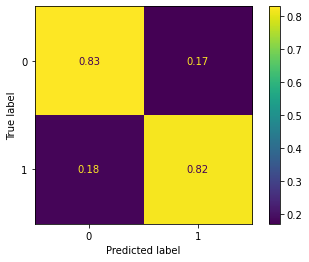

In [55]:
plot_confusion_matrix(model_rf2, X_test, y_test, normalize = 'true') # recall
plt.show()

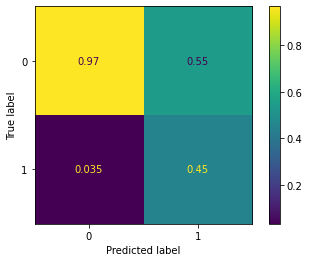

In [56]:
plot_confusion_matrix(model_rf2, X_test, y_test, normalize = 'pred') # precision
plt.show()

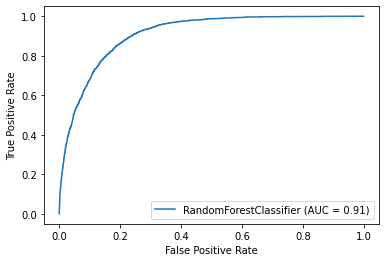

In [57]:
plot_roc_curve(model_rf2, X_test, y_test)


##Understanding the model


In [58]:
model_rf2_importance = pd.Series(model_rf2.feature_importances_, index = features_list)
model_rf2_importance

GENDER_F                            0.001053
AGE                                 0.016472
LOS                                 0.047224
LOS_ICU                             0.030201
CALLOUT_COUNT_DAY                   0.009816
PRES_COUNT_DAY                      0.010066
PROC_COUNT_DAY                      0.011974
CPT_COUNT_DAY                       0.049551
LAB_COUNT_DAY                       0.025693
INPUTS_CV_COUNT_DAY                 0.007512
INPUTS_MV_COUNT_DAY                 0.005016
OUTPUT_COUNT_DAY                    0.009694
TRANSFER_COUNT_DAY                  0.053179
MICRO_COUNT_DAY                     0.307348
ADMISSION_TYPE_ELECTIVE             0.005040
ADMISSION_TYPE_EMERGENCY            0.019027
ADMISSION_TYPE_NEWBORN              0.004732
ADMISSION_TYPE_URGENT               0.000705
RELIGION_CATHOLIC                   0.000815
RELIGION_NOT SPECIFIED              0.000632
RELIGION_OTHERS                     0.000869
INSURANCE_Medicare                  0.002046
INSURANCE_

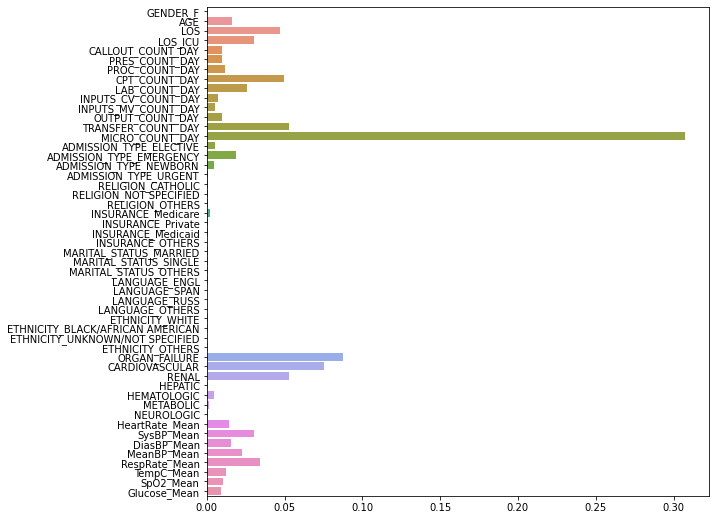

In [59]:
plt.figure(figsize = (9, 9))
sns.barplot(x = model_rf2.feature_importances_, y = features_list)

**Saving and Loading your trained model**


In [60]:
import joblib

In [64]:
joblib.dump(model_rf2, gdrive_rootpath + 'mimic_in_hosp_mortality_model_rf2.joblib') # specify your filename here

['/content/gdrive/MyDrive/mimic_in_hosp_mortality_model_rf2.joblib']

In [62]:
model_rf2_loaded = joblib.load(gdrive_rootpath + 'mimic_in_hosp_mortality_model_rf2.joblib') # specify your filename here

In [63]:
model_rf2_loaded


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)